In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%store -r data_frame_2_1
df = data_frame_2_1

In [4]:
first_distances = [4, 6, 8, 10, 14, 18, 22, 28, 34]
second_distances = [6, 8, 10, 16, 22, 30, 40]
comparisons = [ [4,6], [4,8], [4,10], [4,16], [4,22], [4,30], [4,40], [6,8], [6,10], [6,16], [6,22], [6,30], [6,40], [8,10], [8,16], [8,22], [8,30], [8,40],
    [10,16], [10,22], [10,30], [10,40], [14,16], [14,22], [14,30], [14,40], [18,22], [18,30], [18,40], [22,30], [22,40], [28,30], [28,40], [34,40] ]

In [5]:
len(data_frame_2_1['uniqueid'].unique())

200

In [6]:
'''
Recreating the accuracy graph from the JOI vs JOR paper by Mark Howard

Takes in a specified pandas dataframe with the correct fields from
the JOR v1.0 or v1.1 experiment and outputs a correctness graph in the
manner of the JOI vs JOR paper.
'''
def recreate_rt_graph(df, comparisons, first_distances, second_distances):

    '''
    '''
    def average_for_comp(df, comp):
        ordered = df[df['left_comp_type'] == comp[0]]
        ordered = ordered[ordered['right_comp_type'] == comp[1]]
        inverse = df[df['left_comp_type'] == comp[1]]
        inverse = inverse[inverse['right_comp_type'] == comp[0]]
        temp = pd.concat([ordered, inverse])
        corr = temp[temp['correct_side'] == temp['chosen_side']]
        rt = corr['rt'].mean()
        return rt
    
    
    '''
    NOTE: this is standard error of the mean over subjects
    '''
    def ste_for_comp(df, comp):
        
        means = []
        for i in df['uniqueid'].unique():
            temp_df = df[df['uniqueid'] == i]
            means.append(average_for_comp(temp_df, comp))
        
        return stats.sem(means)
    
    '''
    '''
    def graph_for_distance(more_recent_item, second_distances, df):
        y = []
        x = []
        yerr = []
        
        # For each second distance, if it is larger than the given first distance, calculate
        for i in range(len(second_distances)):
            if more_recent_item < second_distances[i]:
                x.append(second_distances[i])
                y.append(average_for_comp(df, [more_recent_item, second_distances[i]]))
                yerr.append(ste_for_comp(df, [more_recent_item, second_distances[i]]))

        x = np.array(x)
        y = np.array(y)
        yerr = np.array(yerr)
        
        # graph the line:
        color = 'black'
        marker = 'o'

        #colors = ['lightgray', 'silver', 'darkgrey', 'gray', 'dimgrey', 'black']
        #color = colors[more_recent_item]
        #markers = ['o', 'v', 's', 'P', 'd', 'X' ]
        #marker = markers[index]

        # Graph line
        #ax.plot(x, y, clip_on = False, color = color, marker = marker, label=distances[more_recent_item])
        #ax.fill_between(x, y-yerr, y+yerr, alpha=0.7, edgecolor=color, facecolor=color)
        ax.errorbar(x, y, yerr=yerr, clip_on = False, marker = marker, label=more_recent_item)

    fig, ax = plt.subplots()
    #plt.ylim(0, 1)
    plt.title('Response Time In Cross Category Judgments')
    plt.ylabel('Response Time (ms)')
    plt.xlabel('Lag to the less recent probe')
    ax.yaxis.set_ticks_position('both')
    
    for i in first_distances:
        graph_for_distance(i, second_distances, df)
        
    lgd = plt.legend(title = 'Lag to the more\n  recent probe', fancybox=True, bbox_to_anchor=(1.32, 1))
    plt.savefig('joir_rt_mimic_2_1.pdf', format='pdf', dpi=1200, bbox_extra_artists=[lgd], bbox_inches='tight')
    plt.show()

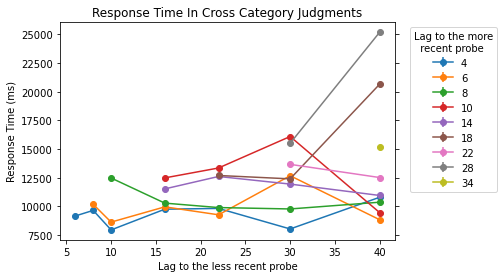

In [7]:
recreate_rt_graph(df, comparisons, first_distances, second_distances)